In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Calculating the top and bottom threshold values
top_percentile = df['value'].quantile(0.975)
bottom_percentile = df['value'].quantile(0.025)

# Clean data
filter_df = df[(df['value'] >= bottom_percentile) & (df['value'] <= top_percentile)]

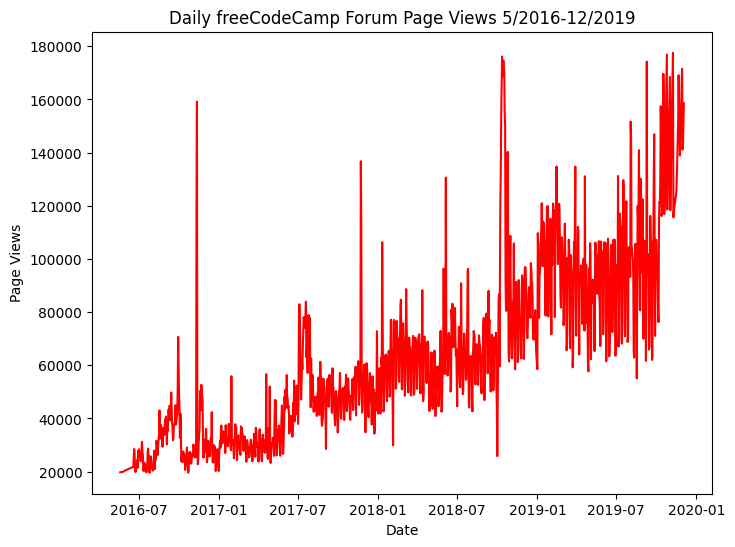

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
# Draw line plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(filter_df['date'], filter_df['value'], color='red', linestyle='-')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

# Save image and return fig (don't change this part)
fig = plt.gcf()
fig.savefig('line_plot.png')
fig

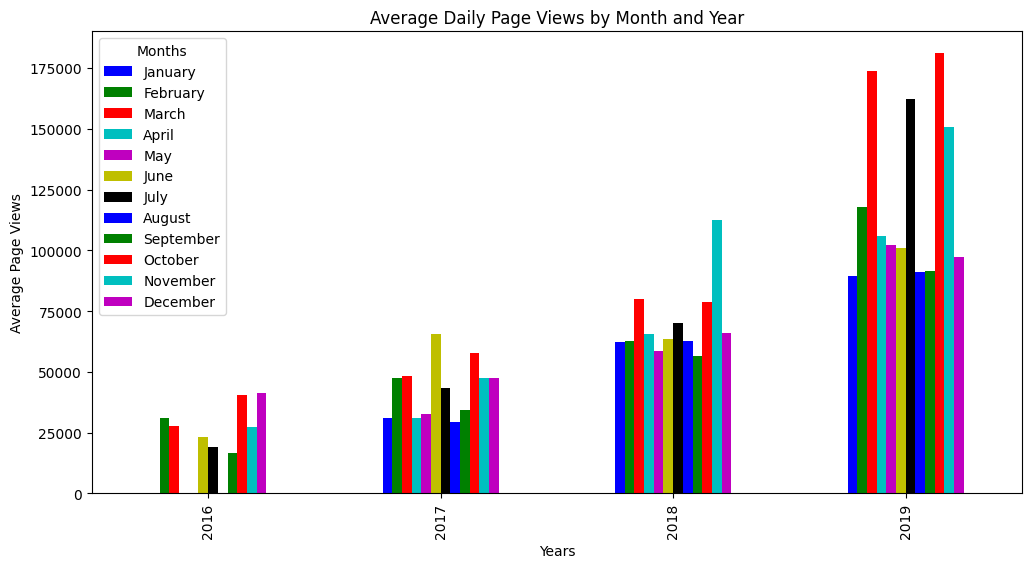

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
# Copy and modify data for monthly bar plot
df['month'] = df['date'].dt.strftime('%B')
df['year'] = df['date'].dt.year

# Group by year and month, and calculate th eaverage page view
pivot_df = df.groupby(['year', 'month'])['value'].mean().unstack()

# Define month labels and colors for legend
month_labels = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
  
df_bar = pivot_df.plot(kind='bar', figsize=(12,6), color=colors)

# Set labels and title
df_bar.set_xlabel('Years')
df_bar.set_ylabel('Average Page Views')
df_bar.set_title('Average Daily Page Views by Month and Year')

# Set x-axis tick labels to be the year values
df_bar.set_xticklabels(pivot_df.index)

# Add a legend with month labels
df_bar.legend(labels=month_labels, title='Months')

# Show the plot
plt.show()

# Save image and return fig (don't change this part)
fig = plt.gcf()
fig.savefig('bar_plot.png')
fig

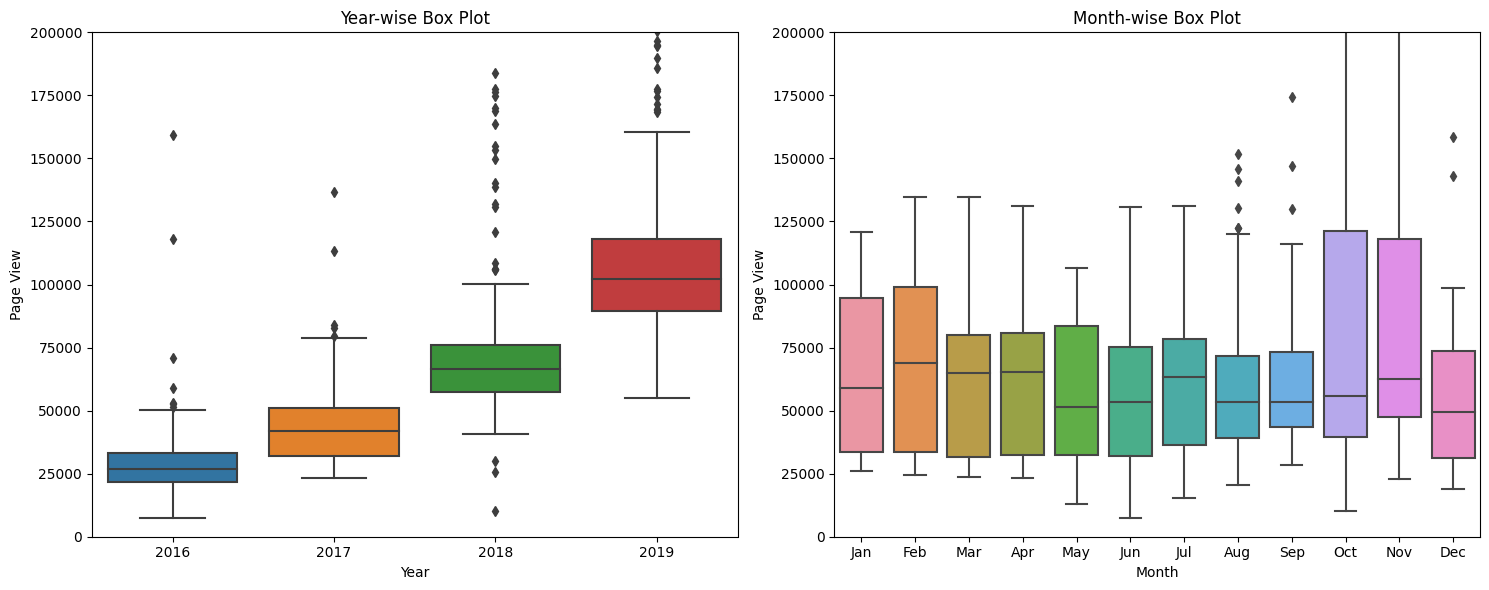

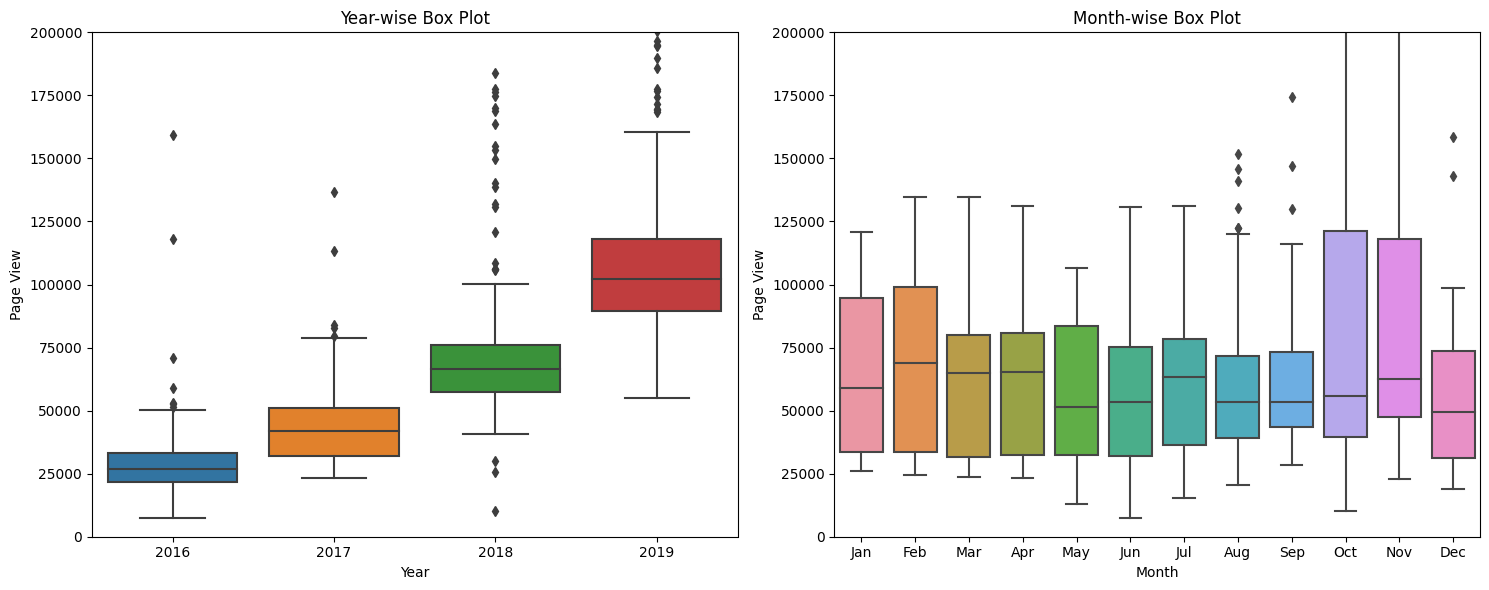

In [10]:
# Prepare data for box plots (this part is done!)
df['date'] = pd.to_datetime(df['date'])
df_box = df.copy()

df_box.reset_index(inplace=True)

df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Year-wise Box Plot (Trend)

sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title("Year-wise Box Plot")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page View")
axes[0].set_ylim(0, 200000)


# Month-wise Box Plot (Seasonality)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page View")
axes[1].set_ylim(0, 200000)

# Adjust the layout
plt.tight_layout()

# Save image and return fig (don't change this part)
fig = plt.gcf()
fig.savefig('box_plot.png')
fig